## Problem Statement:


The objective of this assignment is to develop an AI system that can take an input image containing a specific object and replace that object with a new image provided as a reference. In this assignment, we will focus on replacing a sofa in a given image with a new sofa image

### Created By: Bandi Saideva
### Last Edit : 14/06/2023 6:30 PM

### Requirements
Python 3.8.16 <br>
pip  23.1.2

In [1]:
!git clone https://github.com/sujaykhandekar/Automated-objects-removal-inpainter.git

fatal: destination path 'Automated-objects-removal-inpainter' already exists and is not an empty directory.


In [2]:
!conda install pytorch==1.5.1 torchvision==0.6.1 -c pytorch

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.13.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [3]:
!pip install -r Automated-objects-removal-inpainter/requirements.txt

  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Using cached opencv_python-4.3.0.38-cp38-cp38-win_amd64.whl (33.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.7.0.72
    Uninstalling opencv-python-4.7.0.72:
      Successfully uninstalled opencv-python-4.7.0.72


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tts 0.11.1 requires anyascii, which is not installed.
tts 0.11.1 requires coqpit>=0.0.16, which is not installed.
tts 0.11.1 requires cython==0.29.28, which is not installed.
tts 0.11.1 requires flask, which is not installed.
tts 0.11.1 requires g2pkk>=0.1.1, which is not installed.
tts 0.11.1 requires gruut[de]==2.2.3, which is not installed.
tts 0.11.1 requires inflect==5.6.0, which is not installed.
tts 0.11.1 requires jamo, which is not installed.
tts 0.11.1 requires jieba, which is not installed.
tts 0.11.1 requires librosa==0.8.0, which is not installed.
tts 0.11.1 requires mecab-python3==1.0.5, which is not installed.
tts 0.11.1 requires nltk, which is not installed.
tts 0.11.1 requires pypinyin, which is not installed.
tts 0.11.1 requires pysbd, which is not installed.
tts 0.11.1 requires soundfile, which 

In [4]:
%pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Downloading the models folder from google drive link
import gdown
import zipfile

def download_folder_from_drive(folder_url, destination_folder):
    # Get the ID of the folder from the URL
    folder_id = folder_url.split('/')[-1]

    # Set the URL for the folder's metadata
    metadata_url = f"https://drive.google.com/drive/folders/{folder_id}"

    # Use gdown to download the folder as a zip file
    zip_url = f"https://drive.google.com/uc?id={folder_id}&export=download"
    gdown.download(zip_url, "temp.zip")

    # Extract the contents of the zip file to the destination folder
    with zipfile.ZipFile("temp.zip", 'r') as zip_ref:
        zip_ref.extractall(destination_folder)

    print("Folder downloaded successfully!")

# Example usage
folder_url = "https://drive.google.com/file/d/1__8yXujPdIEnakQLMrlN1eaPCGHPWC7w"
destination_folder = "Automated-objects-removal-inpainter/checkpoints"

download_folder_from_drive(folder_url, destination_folder)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1__8yXujPdIEnakQLMrlN1eaPCGHPWC7w&export=download
From (redirected): https://drive.google.com/uc?id=1__8yXujPdIEnakQLMrlN1eaPCGHPWC7w&export=download&confirm=t&uuid=ba29acb7-6398-4169-8926-a86888d3bf14
To: d:\Computer_Vision\FINAL_FOLDER_OBJECT_REPLACEMENT_AI\temp.zip
100%|██████████| 101M/101M [00:12<00:00, 8.20MB/s] 


Folder downloaded successfully!


In [6]:
# Copying into correct folder location
import shutil
import os

def copy_files(source_folder, destination_folder):
    # Get the list of files in the source folder
    files = os.listdir(source_folder)

    # Iterate over each file in the source folder
    for file in files:
        # Create the full path of the source file
        source_file = os.path.join(source_folder, file)

        # Create the full path of the destination file
        destination_file = os.path.join(destination_folder, file)

        # Copy the file to the destination folder
        shutil.copy(source_file, destination_file)

# Example usage
source_folder = "Automated-objects-removal-inpainter/checkpoints/object_segmentation_models"
destination_folder = "Automated-objects-removal-inpainter/checkpoints"

copy_files(source_folder, destination_folder)

In [7]:
# deleting the unwanted files and folders
os.remove("temp.zip")
shutil.rmtree(source_folder)

In [8]:
# creating the folder for the images

# Specify the folder name
folder_name = "images"

# Create the folder
os.makedirs(folder_name, exist_ok=True)

In [9]:
# downloading the input image

import requests

# Google Drive image URL
image_url = "https://drive.google.com/uc?id=1GwD8aLJUsnkxHjAKg-gEBm9cX8A8ioUL"

# Send a GET request to download the image
response = requests.get(image_url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the file name from the URL
    file_name = "images/input_image.jpg"
    
    # Save the image
    with open(file_name, "wb") as file:
        file.write(response.content)
        print("Image downloaded successfully!")
else:
    print("Failed to download the image. Status code:", response.status_code)


Image downloaded successfully!


In [10]:
os.getcwd()

'd:\\Computer_Vision\\FINAL_FOLDER_OBJECT_REPLACEMENT_AI'

In [11]:
os.chdir("Automated-objects-removal-inpainter")

In [12]:
os.getcwd()

'd:\\Computer_Vision\\FINAL_FOLDER_OBJECT_REPLACEMENT_AI\\Automated-objects-removal-inpainter'

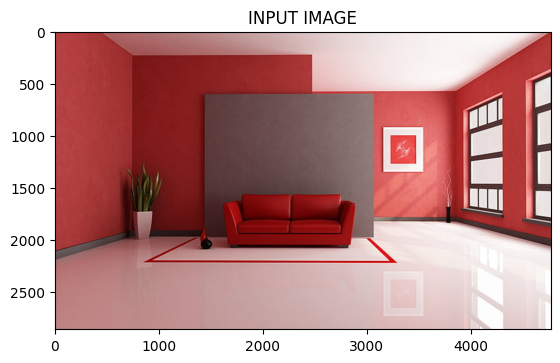

In [13]:
# input image

import matplotlib.pyplot as plt
from PIL import Image
image = Image.open('../images/input_image.jpg')
plt.title("INPUT IMAGE")
plt.imshow(image);

In [14]:
# REMOVING THE SOFA FROM THE INPUT IMAGE
import subprocess

def run_bash_command(command):
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()

    if process.returncode == 0:
        # Command executed successfully
        print("Command executed successfully.")
        if stdout:
            print("Output:")
            print(stdout.decode("utf-8"))
    else:
        # Error occurred
        print("Error occurred while executing the command.")
        if stderr:
            print("Error message:")
            print(stderr.decode("utf-8"))

# Example usage
command = "python test.py --input ../images/input_image.jpg --output ../removed_sofa_images --remove 18 --cpu yes"

run_bash_command(command)

Command executed successfully.
Output:
Loading EdgeModel generator...
Loading InpaintingModel generator...

start testing...

1 input_image.jpg

End test....



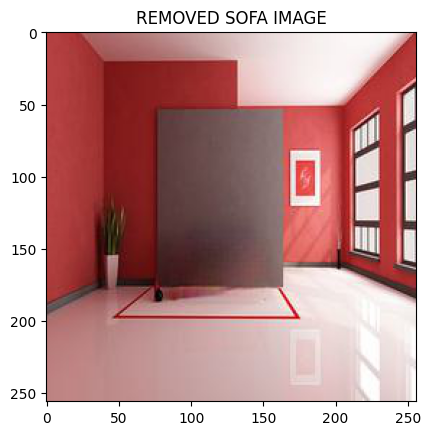

In [15]:
# input image

import matplotlib.pyplot as plt
from PIL import Image
image = Image.open('../removed_sofa_images/input_image.jpg')
plt.title("REMOVED SOFA IMAGE")
plt.imshow(image);

In [16]:
%pip install rembg
%pip install -U opencv-python

  Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Admin\\.conda\\envs\\myenv\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.3.0.38
    Uninstalling opencv-python-4.3.0.38:
      Successfully uninstalled opencv-python-4.3.0.38
Note: you may need to restart the kernel to use updated packages.


## RESTART THE KERNEL

In [1]:
import os

In [2]:
from rembg import remove

In [3]:
import requests

# Google Drive image direct download link
image_url = "https://drive.google.com/uc?export=download&id=11HjsqNfAJ5FzJ22osJMhaojH2GIHiJ8K"

# Send a GET request to download the image
response = requests.get(image_url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the file name from the URL
    file_name = "images/sofa.jpg"
    
    # Save the image
    with open(file_name, "wb") as file:
        file.write(response.content)
        print("Image downloaded successfully!")
else:
    print("Failed to download the image. Status code:", response.status_code)

Image downloaded successfully!


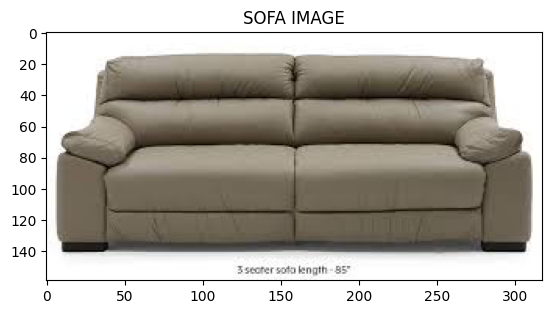

In [4]:
# DOWNLOADED SOFA IMAGE

import matplotlib.pyplot as plt
from PIL import Image
image = Image.open('images/sofa.jpg')
plt.title("SOFA IMAGE")
plt.imshow(image);

In [5]:
output_path = 'images/removed_bg_sofa_img.jpg'
with open(output_path, 'wb') as f:
    input = open('images/sofa.jpg', 'rb').read()
    removed_bg_img =remove(input)
    f.write(removed_bg_img)

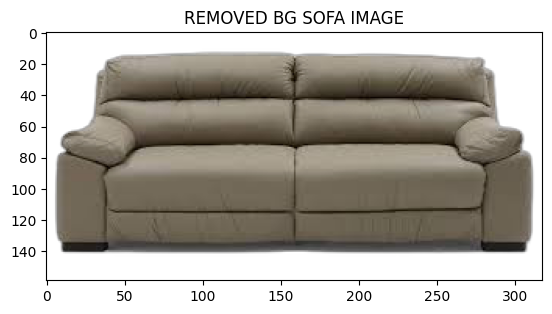

In [6]:
# REMOVED BG SOFA IMAGE

import matplotlib.pyplot as plt
from PIL import Image
image = Image.open('images/removed_bg_sofa_img.jpg')
plt.title("REMOVED BG SOFA IMAGE")
plt.imshow(image);

In [7]:
# getting the size of the removed sofa image


removed_sofa_img = Image.open("removed_sofa_images/input_image.jpg")
# Get the width and height of the image
width, height = removed_sofa_img.size

# Print the width and height
print("Image Width:", width)
print("Image Height:", height)

Image Width: 256
Image Height: 256


In [8]:
image_path = "images/removed_bg_sofa_img.jpg"
image = Image.open(image_path)

# we found the sofa size in new 256, 256 should be 75 and 51
image = image.resize((75, 51)) # based on old sofa in the input image size the size of the new sofa in (256, 256) sould be 75 and 51
image.save("images/resized_and_removed_bg_img.png")

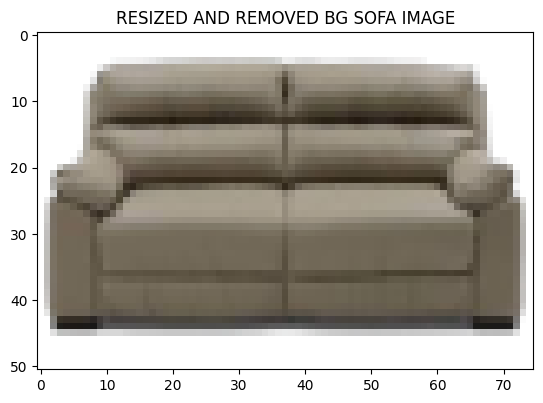

In [9]:
# RESIZED AND REMOVED BG SOFA IMAGE

import matplotlib.pyplot as plt
from PIL import Image
image = Image.open('images/resized_and_removed_bg_img.png')
plt.title("RESIZED AND REMOVED BG SOFA IMAGE")
plt.imshow(image);

In [10]:
# new sofa image which be put on top of removed sofa input image
foreground_img = Image.open("images/resized_and_removed_bg_img.png")

In [11]:
# removed sofa input image
image_path = "removed_sofa_images/input_image.jpg"
background_img = Image.open(image_path)

In [12]:
# pasting the new sofa at the center of the old sofa
background_img.paste(foreground_img, (90, 150), foreground_img)

In [13]:
# saving the output image
background_img.save('images/small_size_output.png')

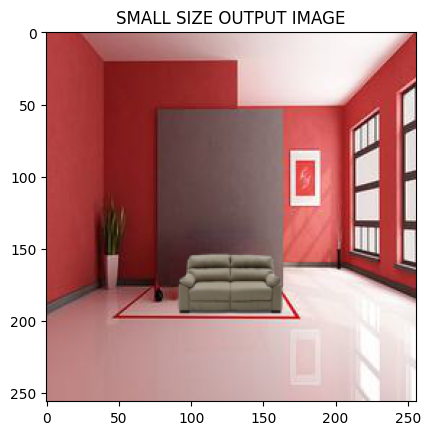

In [14]:
# SMALL SIZE OUTPUT IMAGE

import matplotlib.pyplot as plt
from PIL import Image
image = Image.open('images/small_size_output.png')
plt.title("SMALL SIZE OUTPUT IMAGE")
plt.imshow(image);

In [15]:
# resizing the output image

image_path = "images/small_size_output.png"
image = Image.open(image_path)
image = image.resize((4769, 2862)) # resizing into given original image size
image.save("images/final_output_img.png")

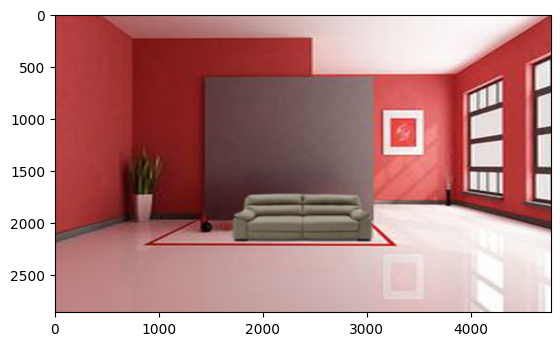

In [16]:
import matplotlib.pyplot as plt
plt.imshow(image);